<a href="https://colab.research.google.com/github/tiffanyndanu/Hypothyroidism/blob/main/Hypothyridism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. DEFINING THE QUESTION.**

# a) Specifying the question.

We're working with Nairobi Hospital after running a clinical camp to test for hypothyroidism. The hospital has gathered data on Thyroid patients and intends to develop a model that can assess whether a patient's symptoms indicate hypothyroidism.

# b) Defining the metric for succcess

The model that will be considered a success will be the one that provides the most accurate assessment of Hypothyroidism in a patient.

# c) Understanding the context

The Nairobi hospiatal conducted a clinical camp to test for Hypothyrodism. The data they received was recorded in the dataset presented below. The hospital has requested the service of data scientist to look at the data and provide useful insights into recognising the symptoms of hypothyroidsm in the population from several symptoms. The different thyroid function tests such as TSH, T3, T4U, Total T4, and Free T4 Index (FTI) are done to assess the various functions related to the thyroid gland. A normal TSH and normal T4 is indicative of normal functioning of the thyroid gland, a low TSH and elevated T4 indicates hyperthyroidism, a low TSH and low T4 indicates secondary hypothyroidism, and a high TSH and low T4 indicates primary hypothyroidism.

# d) Recording the experimental design

The experiement took place in several steps recorded below:

1.Importing the appropriate libraries and reading the data.

2.Preparing the data for analysis.

3.Cleaning the data by finding and dealing with outliers.

4.Performing Exploratory Data Analysis.

5.Building the models in two parts.

6.Performing evaluation of the models in the data

# e) Appropriateness of data

The data on the patients' age and gender was supplied in the dataset. It also shows people with Hypothyroidism and Hyperthyroidism, as well as whether or not they are taking thyroxine medication. There are two classes in the target data as well. As a result, the dataset appears to be appropriate for training the model to determine if a patient has hypothyroidism or not.

# **2. READING THE DATA.**

In [1]:
# Import all necessary libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score, classification_report, f1_score,r2_score

In [2]:
# Loading the dataset
Hyp = pd.read_csv('http://bit.ly/hypothyroid_data')

# **3. CHECKING THE DATA**

In [3]:
# Determining the no. of records in our dataset
#
Hyp.shape

(3163, 26)

In [4]:
# Understanding our dataset

Hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [5]:
# Preview of our dataset

Hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [6]:
# Checking the columns in the dataset

Hyp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

# **4. CLEANING**

In [7]:
# Removing the question marks in each column

Hyp.replace('?',np.nan,inplace=True)

In [8]:
# Convert Age, TSH, T3, TT4, T4U, FTI to numerical(Float)

Hyp[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]] = Hyp[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]].astype(float)

In [9]:
# remove the TBG columns since it contains almost entirely null values

Hyp.drop(['TBG','TBG_measured'], axis=1, inplace=True)

In [10]:
# calculate the mean age of the column age 
age_mean = Hyp['age'].mean()
print('mean of the age column is:  ',age_mean)

# adding the mean age to the empty cells
Hyp['age'].fillna(age_mean, inplace=True)

mean of the age column is:   51.154214206845786


In [11]:
# replacing the null values of the sex column with the mode sex
Hyp['sex'] = Hyp['sex'].fillna(Hyp['sex'].mode()[0])

In [12]:
# confirming there are no missing values

Hyp.isnull().sum()

status                         0
age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
dtype: int64

Missing values are still present but we shall proceed to avoid losing a large sum of data.

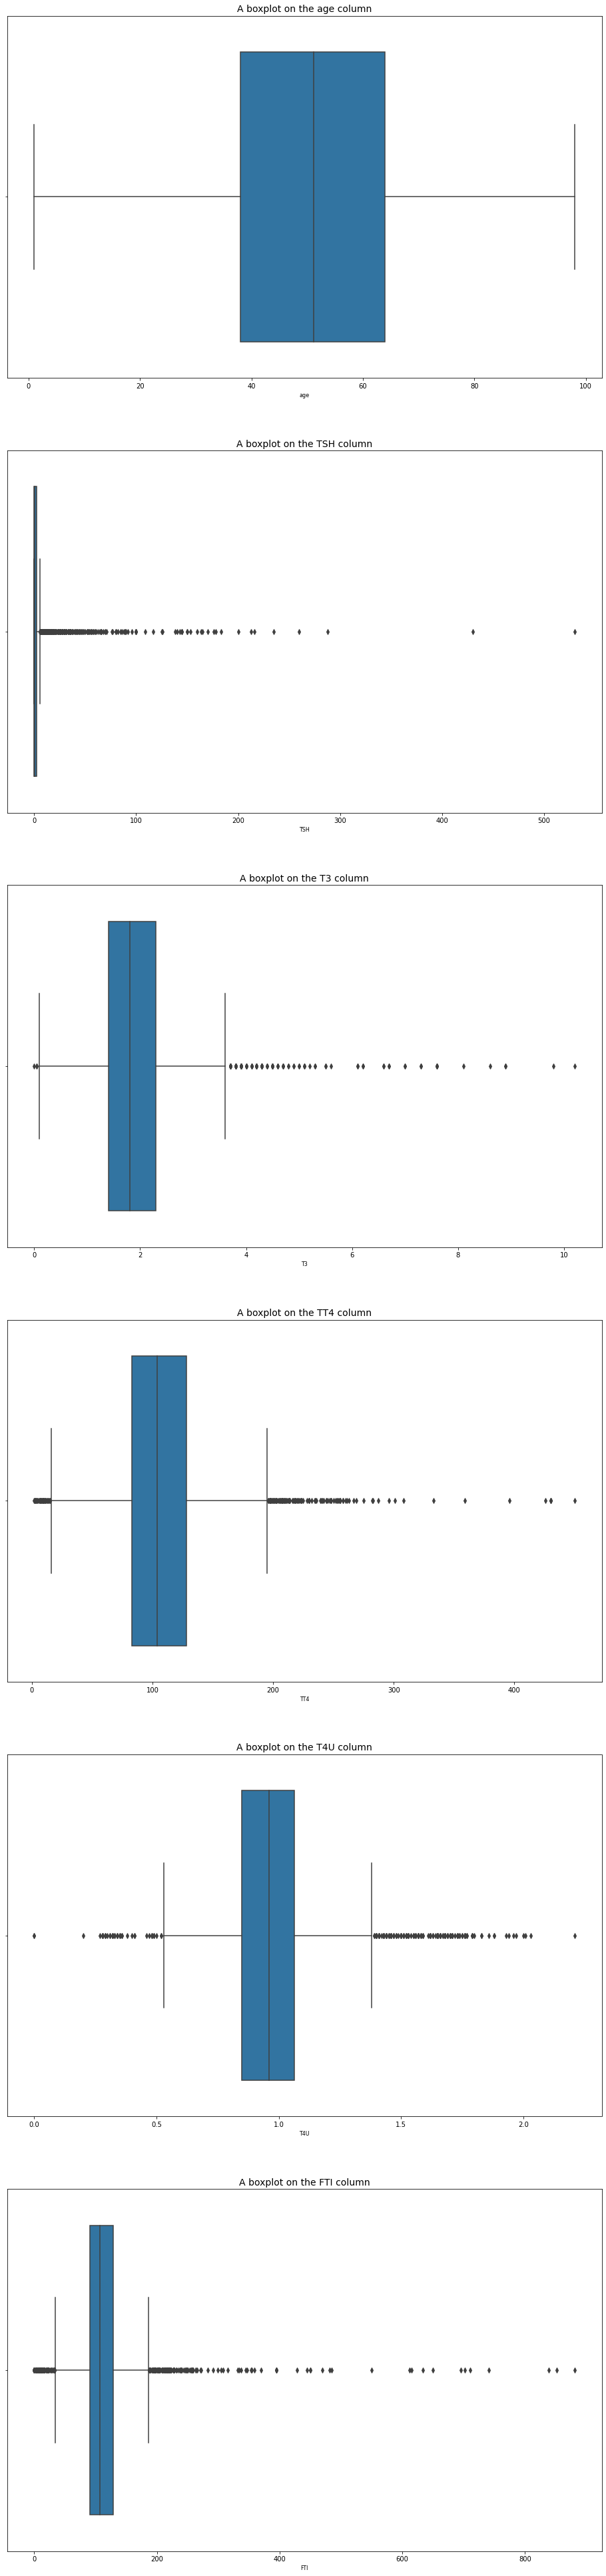

In [13]:
# Checking for Outliers


col_names = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
fig, ax = plt.subplots(len(col_names), figsize = (16,70))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = Hyp[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [14]:
#There seems to be very many outliers but lets count them to be sure

df = Hyp[["age", "TSH", "T3", "TT4", "T4U", "FTI"]]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

age      0
TSH    388
T3     122
TT4    183
T4U    203
FTI    245
dtype: int64

There is a large number of outliers. If dropped, the amount of data might be insufficient for analysis.



In [15]:
# Identifying the duplicate Data

len(Hyp)-len(Hyp.drop_duplicates())

# Dealing with the Duplicate Data
# They are very few entries that are duplicates I will procceed to drop them as now.
Hyp = Hyp.drop_duplicates()

In [16]:
#Encoding columns
# encoding the true / false columns 

cat_cols = ['on_thyroxine','query_on_thyroxine',	'on_antithyroid_medication',	'thyroid_surgery',
       'query_hypothyroid',	'query_hyperthyroid',	'pregnant',	'sick',	'tumor',	'lithium',	'goitre']

# looping through the columns to encode
for col in cat_cols:

  cat_enc = {col:{'f':0,'t':1}}

  Hyp.replace(cat_enc, inplace=True)

  Hyp[col] = Hyp[col].astype(int)

# encoding the yes / no categorical columns
cat_cols = ['TSH_measured','T3_measured','TT4_measured','T4U_measured',
       'FTI_measured']

# looping through the columns to encode
for col in cat_cols:

  cat_enc = {col:{'y':0,'n':1}}

  Hyp.replace(cat_enc, inplace=True)

  Hyp[col].astype(int)

# encoding the sex column
cat_enc = {'sex':{'M':0,'F':1}}

Hyp.replace(cat_enc, inplace=True)

Hyp['sex'].astype(int)

# checking to see if the changes have been effected
Hyp.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,0,0,0,0,0,0,0,0,...,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0
1,hypothyroid,15.0,1,1,0,0,0,0,0,0,...,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0
2,hypothyroid,24.0,0,0,0,0,0,0,0,0,...,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0
3,hypothyroid,24.0,1,0,0,0,0,0,0,0,...,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0
4,hypothyroid,77.0,0,0,0,0,0,0,0,0,...,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0


In [17]:
Hyp.columns = Hyp.columns.str.lower()
Hyp


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,hypothyroid,72.0,0,0,0,0,0,0,0,0,...,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0
1,hypothyroid,15.0,1,1,0,0,0,0,0,0,...,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0
2,hypothyroid,24.0,0,0,0,0,0,0,0,0,...,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0
3,hypothyroid,24.0,1,0,0,0,0,0,0,0,...,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0
4,hypothyroid,77.0,0,0,0,0,0,0,0,0,...,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,1,0,0,0,0,0,0,0,...,0,5.8,0,1.7,0,86.0,0,0.91,0,95.0
3159,negative,29.0,1,0,0,0,0,0,0,0,...,0,0.8,0,1.8,0,99.0,0,1.01,0,98.0
3160,negative,77.0,0,0,0,0,0,0,0,0,...,0,1.2,0,0.6,0,71.0,0,0.68,0,104.0
3161,negative,74.0,1,0,0,0,0,0,0,0,...,0,1.3,0,0.1,0,65.0,0,0.48,0,137.0


In [18]:
Hyp.shape

(3007, 24)

# **5. EXPLORATORY ANALYSIS.**

# UNIVARIATE

## Measures of Central Tendency

In [19]:
# Statistical summary

Hyp.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
count,3007,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,...,3007.000000,2631.000000,3007.000000,2406.000000,3007.000000,2846.000000,3007.000000,2847.000000,3007.000000,2848.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,51.350030,0.704357,0.148321,0.018291,0.013967,0.034253,0.078151,0.075491,0.020286,...,0.125042,5.809320,0.199867,1.933666,0.053542,108.706922,0.053209,0.977559,0.052877,115.489080
std,NaN,17.864731,0.456407,0.355477,0.134023,0.117375,0.181910,0.268454,0.264225,0.141000,...,0.330821,24.023192,0.399967,0.979488,0.225149,44.606704,0.224488,0.225796,0.223824,60.147649
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.400000,0.000000,83.000000,0.000000,0.850000,0.000000,91.000000
50%,NaN,51.154214,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.700000,0.000000,1.800000,0.000000,104.000000,0.000000,0.960000,0.000000,107.000000
75%,NaN,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.200000,0.000000,2.300000,0.000000,127.000000,0.000000,1.060000,0.000000,129.000000


In [20]:
# Mode
# Calculating mode across different columns

Hyp.mode()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,negative,51.154214,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.6,0.0,98.0,0.0,0.98,0.0,98.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.8,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Mean

# Calculating mean across different columns

Hyp.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


age                           51.350030
sex                            0.704357
on_thyroxine                   0.148321
query_on_thyroxine             0.018291
on_antithyroid_medication      0.013967
thyroid_surgery                0.034253
query_hypothyroid              0.078151
query_hyperthyroid             0.075491
pregnant                       0.020286
sick                           0.032258
tumor                          0.013302
lithium                        0.000665
goitre                         0.031593
tsh_measured                   0.125042
tsh                            5.809320
t3_measured                    0.199867
t3                             1.933666
tt4_measured                   0.053542
tt4                          108.706922
t4u_measured                   0.053209
t4u                            0.977559
fti_measured                   0.052877
fti                          115.489080
dtype: float64

In [22]:
# Median
# Calculating the median for across different columns

Hyp.median()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


age                           51.154214
sex                            1.000000
on_thyroxine                   0.000000
query_on_thyroxine             0.000000
on_antithyroid_medication      0.000000
thyroid_surgery                0.000000
query_hypothyroid              0.000000
query_hyperthyroid             0.000000
pregnant                       0.000000
sick                           0.000000
tumor                          0.000000
lithium                        0.000000
goitre                         0.000000
tsh_measured                   0.000000
tsh                            0.700000
t3_measured                    0.000000
t3                             1.800000
tt4_measured                   0.000000
tt4                          104.000000
t4u_measured                   0.000000
t4u                            0.960000
fti_measured                   0.000000
fti                          107.000000
dtype: float64

## Measures of Dispersion

In [23]:
#Range for the respective columns
col = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

x = {}

for col in col:
    x[col] = Hyp[col].max()- Hyp[col].min()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['age', 'tsh', 't3', 'tt4', 't4u', 'fti'], 
       'The range is': [ 97.  , 530.  ,  10.2 , 448.  ,   2.21, 881.  ]} 
modedf =pd.DataFrame(data)
modedf

,Criteria,The range is
0,age,97.00
1,tsh,530.00
2,t3,10.20
3,tt4,448.00
4,t4u,2.21
5,fti,881.00


In [24]:
# Standard Deviation
# We will now calculate the standard deviation to check the spread of our data from the mean
col = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']
x = {}
for col in col:
    x[col] = Hyp[col].std()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['age', 'tsh', 't3', 'tt4', 't4u', 'fti'], 
       'The standard deviation is': [17.86473057, 24.02319247,  0.97948777, 44.60670418,  0.22579596,
       60.14764859]} 
std =pd.DataFrame(data)
std


,Criteria,The standard deviation is
0,age,17.864731
1,tsh,24.023192
2,t3,0.979488
3,tt4,44.606704
4,t4u,0.225796
5,fti,60.147649


In [25]:
#Variance
# We will now calculate the Variance to check the spread of our data from the mean
#
#
col = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']
x = {}
for col in col:
    x[col] = Hyp[col].var()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['age', 'tsh', 't3', 'tt4', 't4u', 'fti'], 
         'The variance is': [3.19148598e+02, 5.77113776e+02, 9.59396286e-01, 1.98975806e+03, 5.09838137e-02, 3.61773963e+03]} 
var =pd.DataFrame(data)
var

,Criteria,The variance is
0,age,319.148598
1,tsh,577.113776
2,t3,0.959396
3,tt4,1989.758060
4,t4u,0.050984
5,fti,3617.739630


In [26]:
# We will now calculate the Kurtosis to check the spread of our data
col = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']
x = {}

for col in col:
    x[col] = Hyp[col].kurt()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['age', 'tsh', 't3', 'tt4', 't4u', 'fti'], 
         'The kurtosis is': [-0.61063975, 153.66952518, 10.95369153, 6.84988693, 3.4314952 , 48.50293438]} 
kurt =pd.DataFrame(data)
kurt

,Criteria,The kurtosis is
0,age,-0.610640
1,tsh,153.669525
2,t3,10.953692
3,tt4,6.849887
4,t4u,3.431495
5,fti,48.502934


In [27]:
# #Skewness
# # We will now calculate the Skewness to check the spread of our data

x = {}
col = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']
for col in col:
    x[col] = Hyp[col].skew()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['age', 'tsh', 't3', 'tt4', 't4u', 'fti'], 
         'The Skew is': [-0.19784403, 10.29193117,  2.16692249,  1.46782754,  0.9521684 , 5.21206511]}
 
skew =pd.DataFrame(data)
skew

,Criteria,The Skew is
0,age,-0.197844
1,tsh,10.291931
2,t3,2.166922
3,tt4,1.467828
4,t4u,0.952168
5,fti,5.212065


## Visualisation

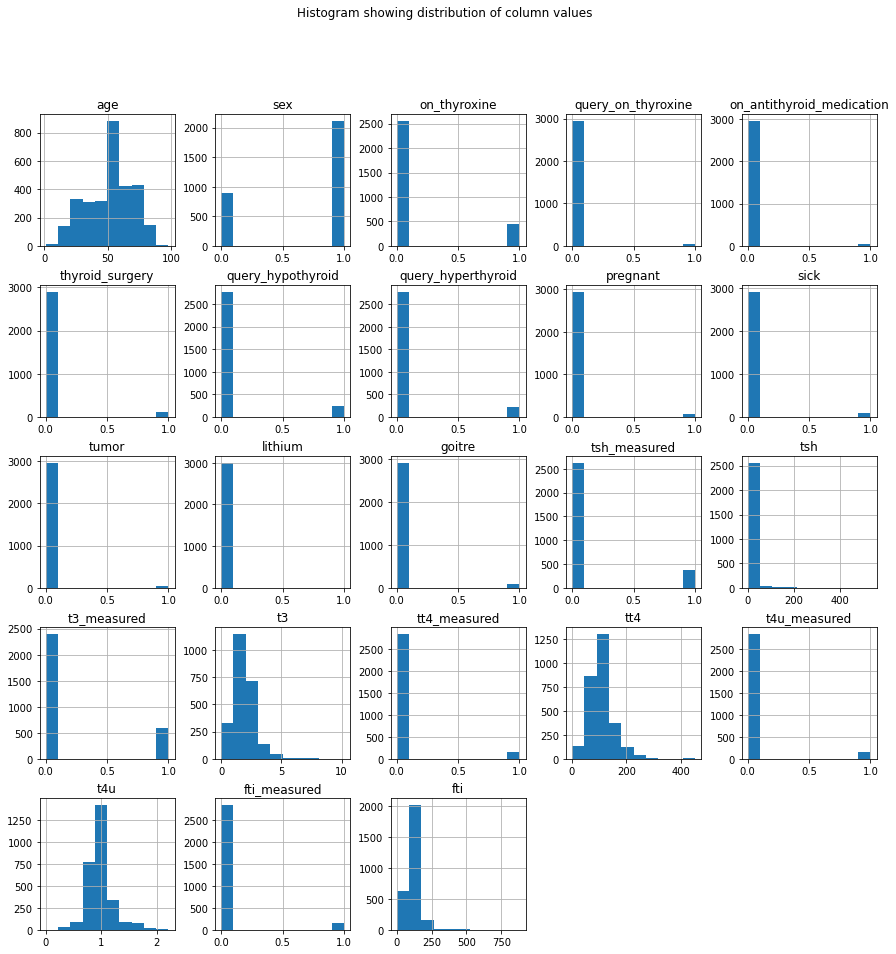

In [28]:
Hyp.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram showing distribution of column values")
plt.savefig('Histogram')
plt.show()

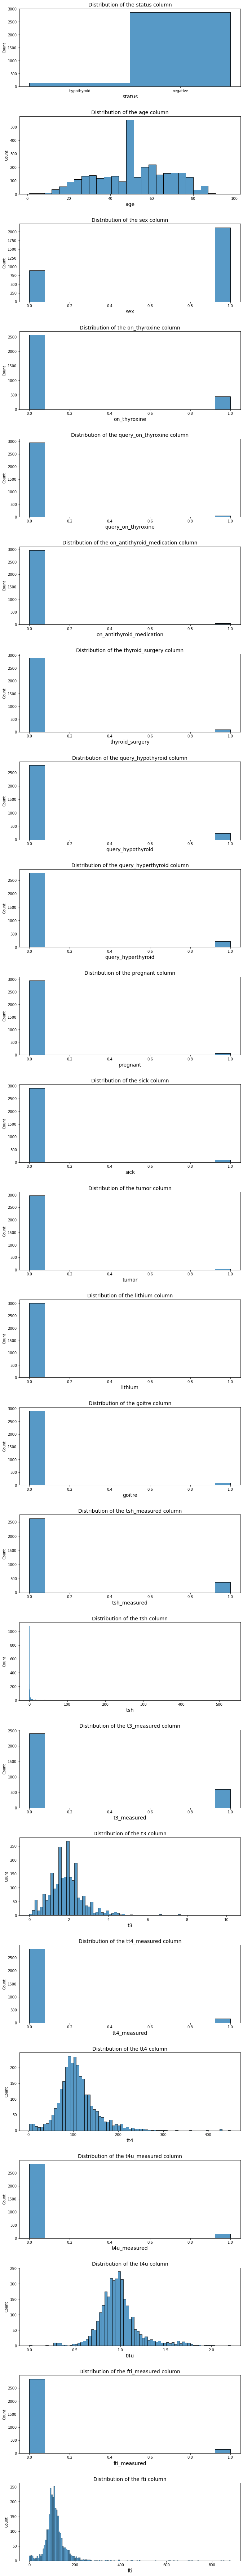

In [29]:
col_names = ['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti']
fig, ax = plt.subplots(len(col_names), figsize = (10,100))
for i, col_val in enumerate(col_names):

    sns.histplot(x = Hyp[col_val], ax=ax[i])
    ax[i].set_title('Distribution of the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

# Bivariate

Our independent variables are;

fti

age

sex

query_on_thyroxine

on_antithyroid_medication

thyroid_surgery

query_hyperthyroid

pregnant

tsh_measured

tsh

t3_measured

t3

tt4_measured

tt4

t4u_measured

t4u

fti_measured

sick

tumor

lithium

goitre

query_hypothyroid

on_thyroxine

Finding out what effect of each independent variable on status

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

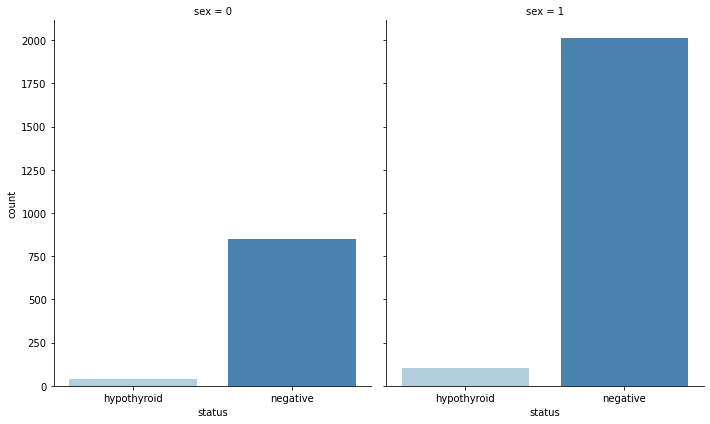

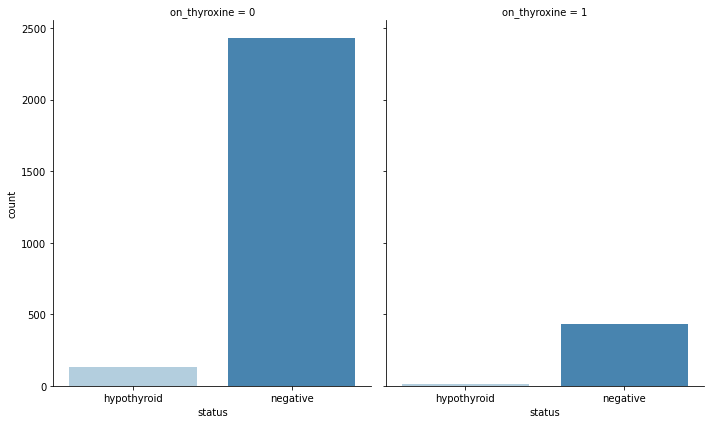

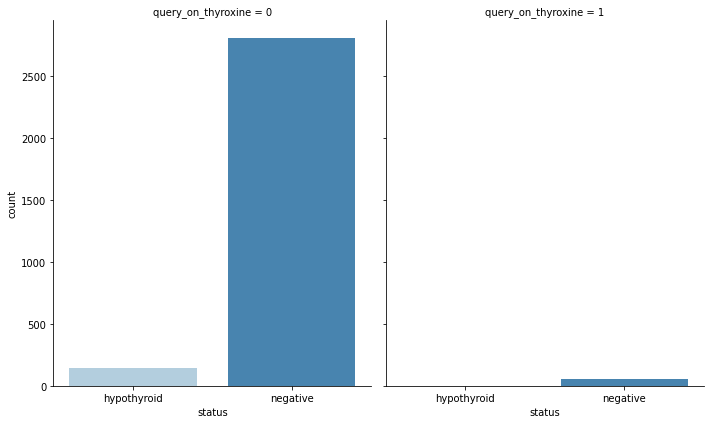

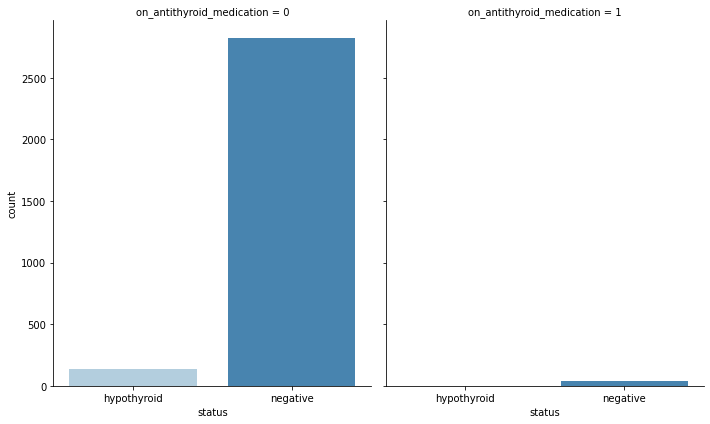

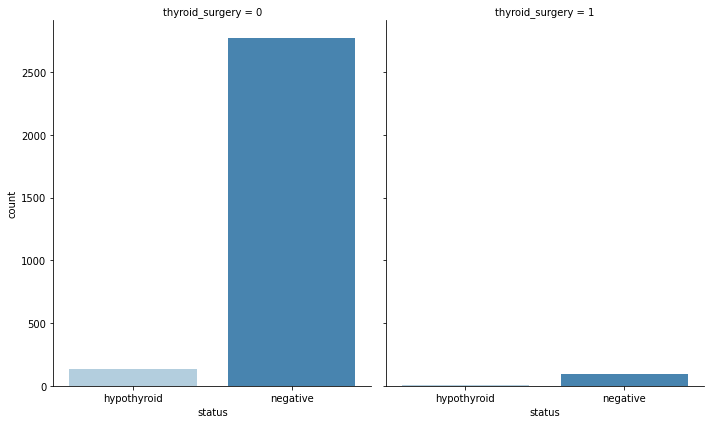

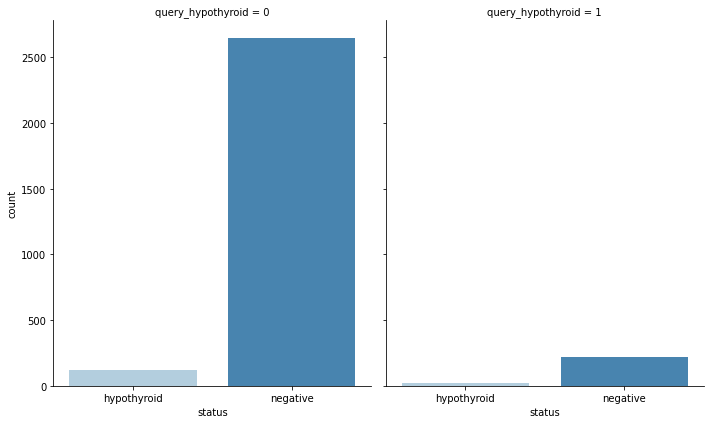

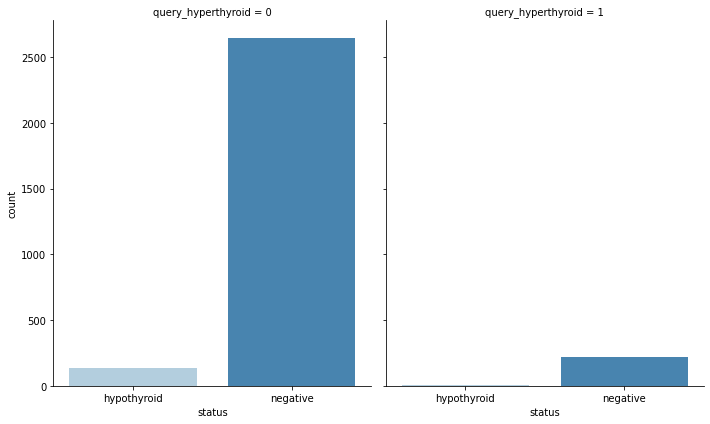

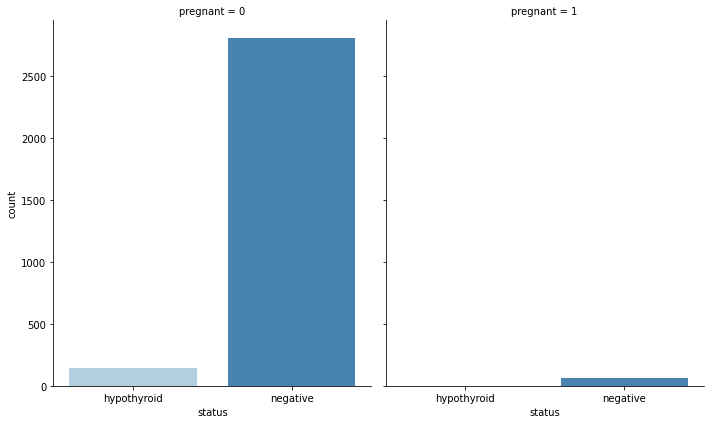

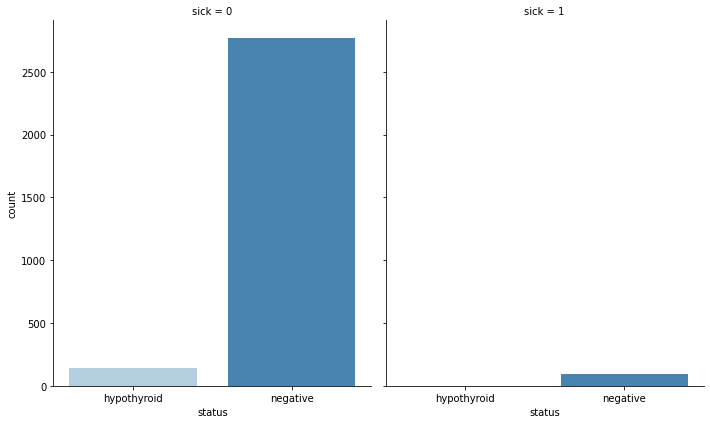

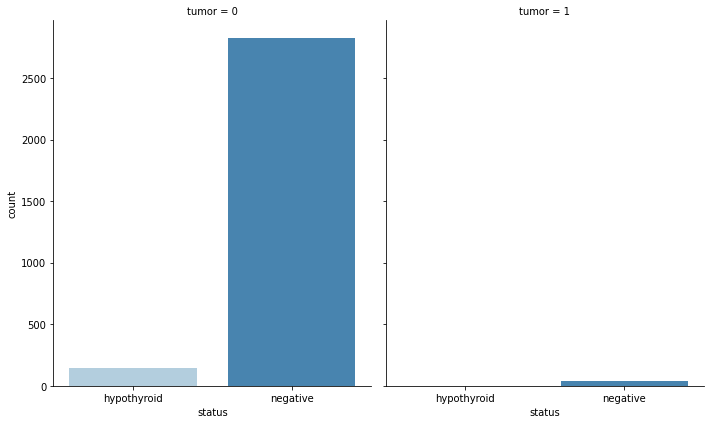

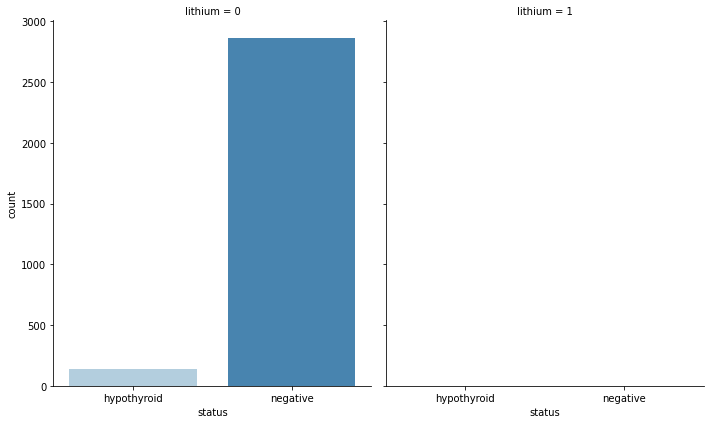

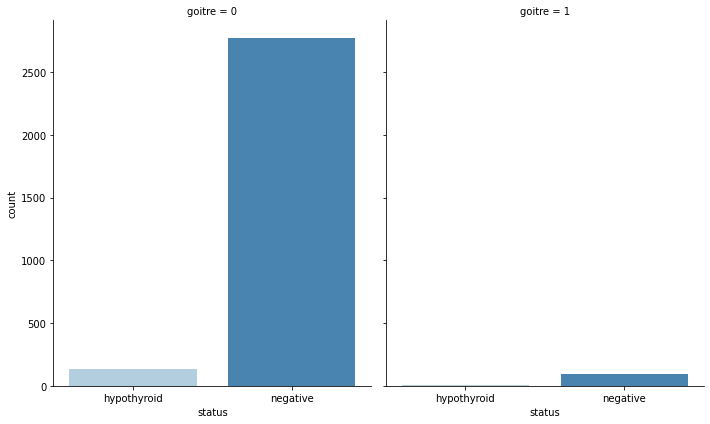

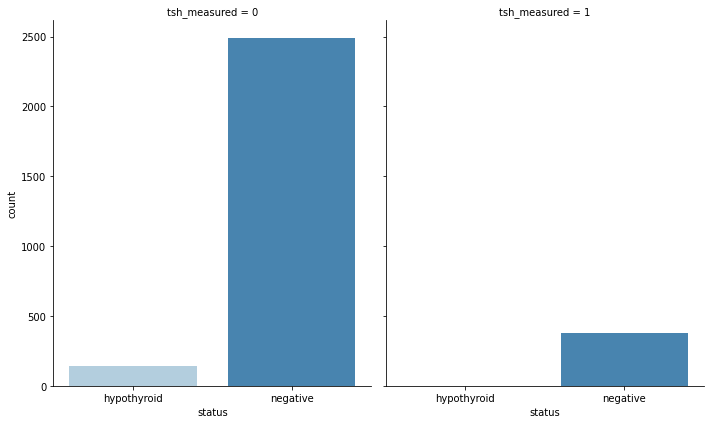

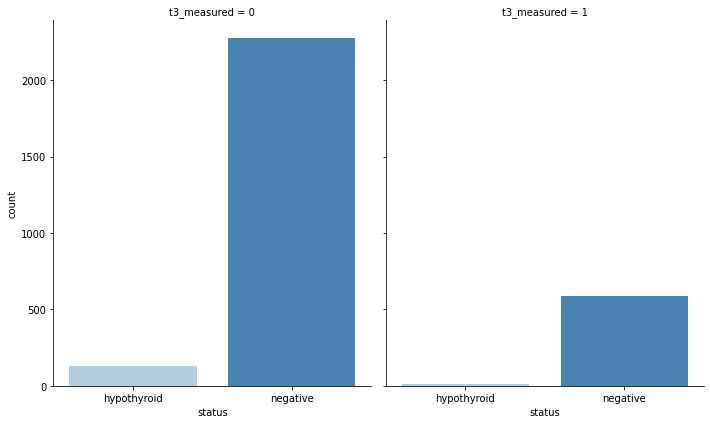

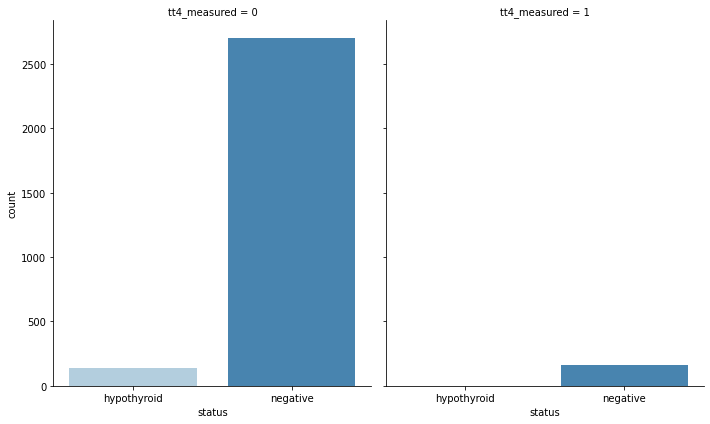

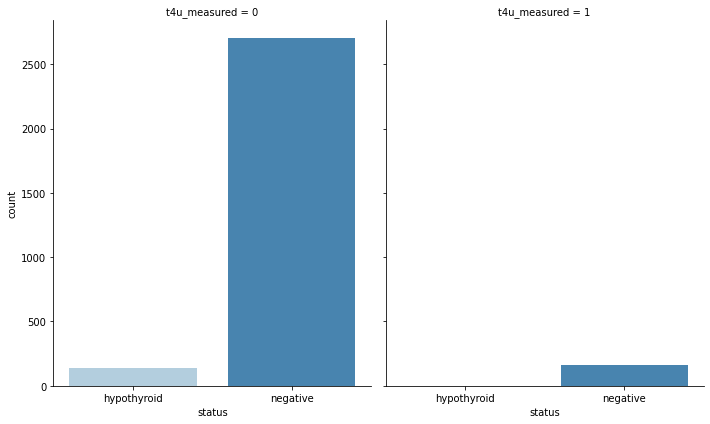

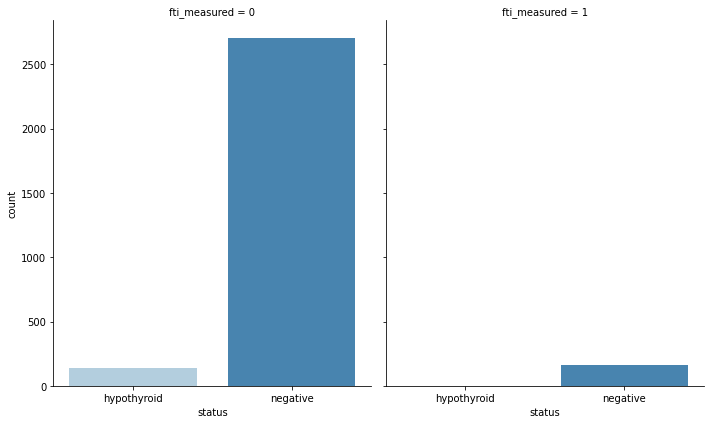

In [30]:
sns.catplot("status", col="sex", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="on_thyroxine", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="query_on_thyroxine", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="on_antithyroid_medication", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="thyroid_surgery", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="query_hypothyroid", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="query_hyperthyroid", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="pregnant", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="sick", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="tumor", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="lithium", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="goitre", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="tsh_measured", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="t3_measured", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="tt4_measured", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="t4u_measured", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')
sns.catplot("status", col="fti_measured", col_wrap=4, data=Hyp, kind="count", height=6, aspect=.8, palette='Blues')

plt.show()

Through the above plots, we can conclude the worst combination on likelyhood of having hypothyroid diseas are

Being female

Not being on thyroxine medication

Not being on antithyroid medication

Not having undergone antithyroid surgery

Not having hypothyroids

Not having hyperthyroids

Not being pregnant

Not showing symptoms of sickness

Not having a tumor

Not having lithium

Not having goitre

Having tsh_measured

Having t3 Measured

Having tt4 Measured

Having t4u measured

Having ft1 measured

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


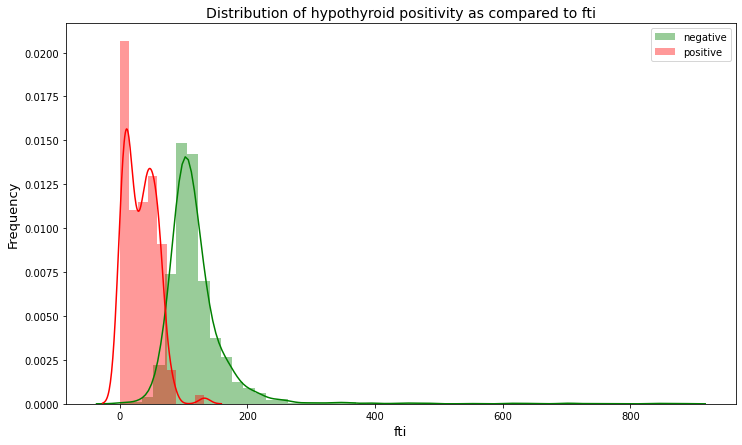

In [31]:
# Plotting histogram to show distribution of hypothyroid positivity as compared to fti
# 
negative = Hyp.loc[Hyp.status=='negative', 'fti']    # Selecting only negative datapoints in the age column
positive = Hyp.loc[Hyp.status=='hypothyroid', 'fti']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(negative, color="green", label="negative")
sns.distplot(positive, color="red", label="positive")
plt.title('Distribution of hypothyroid positivity as compared to fti', fontsize = 14, color = 'k')
plt.xlabel('fti', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

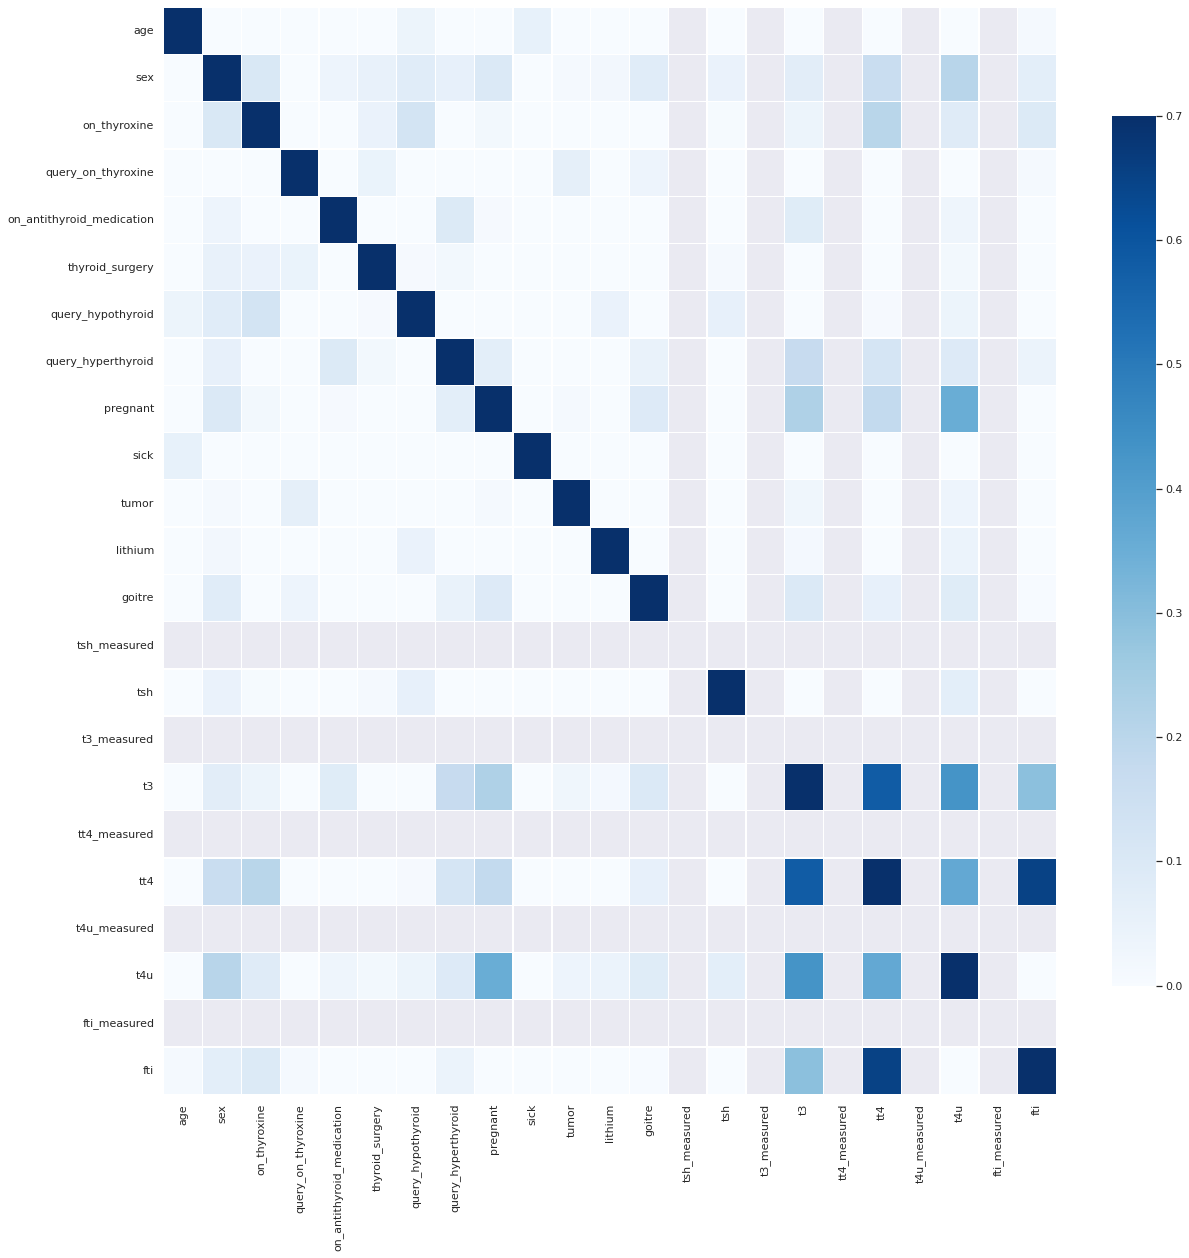

In [55]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
# sns.pairplot(Hyp)
# plt.show()

corr = Hyp.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues", vmin= 0.0, vmax=0.7,
           linewidth=0.3, cbar_kws={"shrink": .8})
sns.set(rc={'figure.figsize':(20,20)})

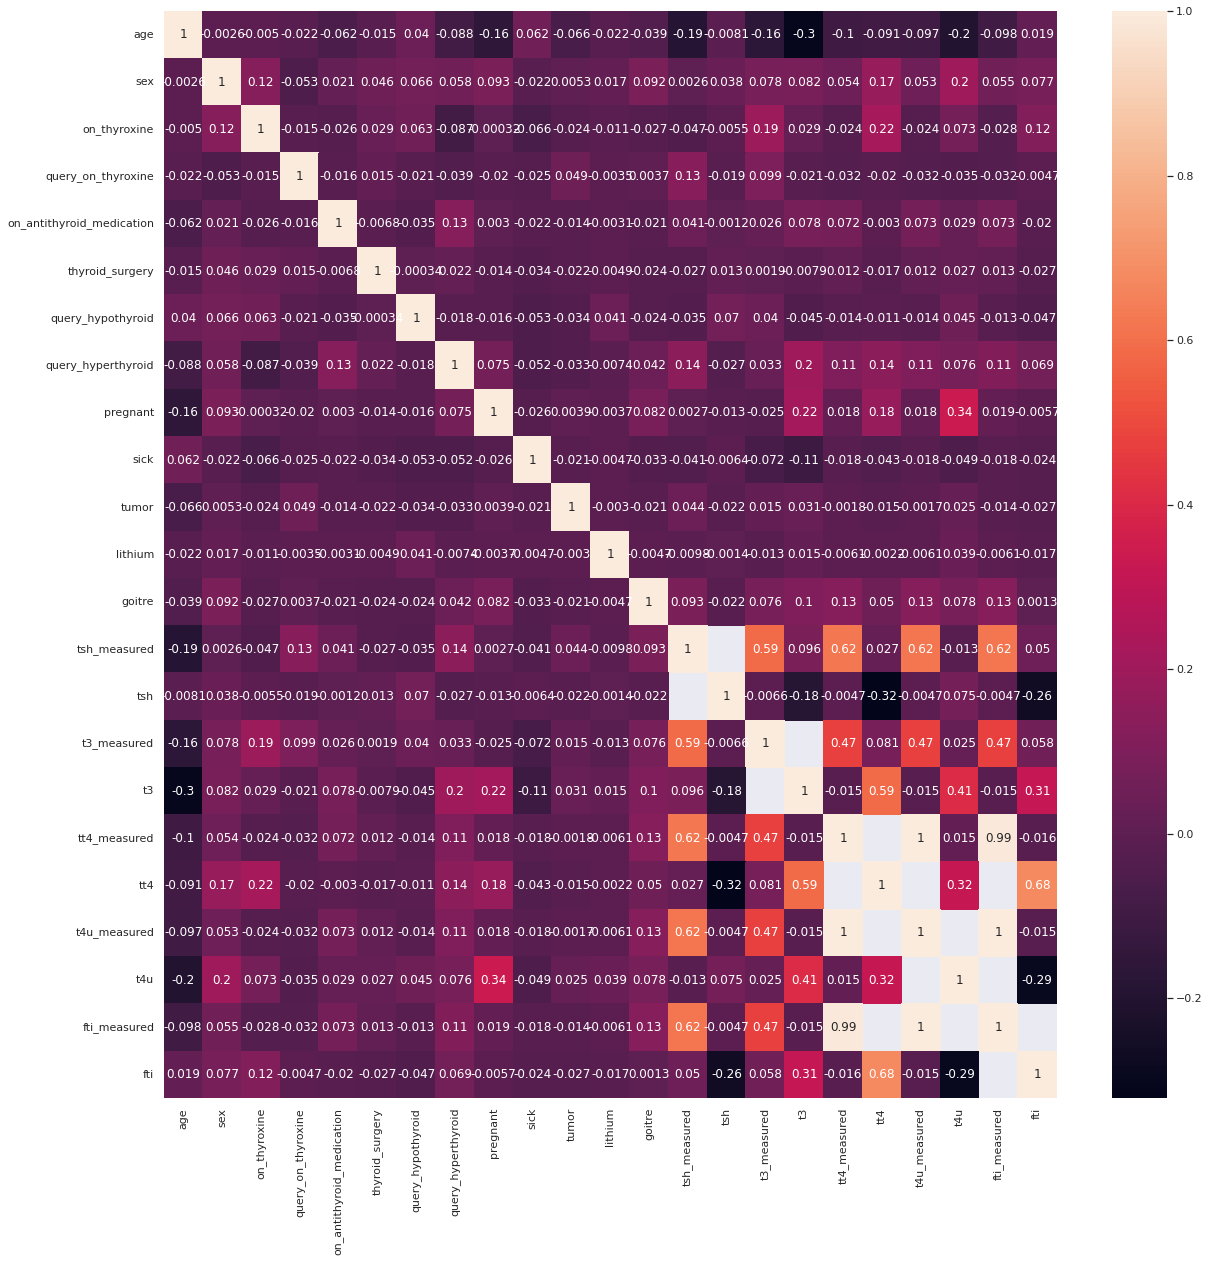

In [33]:
# heatmap
sns.heatmap(Hyp.corr(),annot=True)
plt.show()

# **6. Decision Trees**

## Baseline Model

In [34]:
Hyp = Hyp.dropna()

In [41]:
# split the data into labels and features

X = Hyp[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(Hyp['status']=='hypothyroid',0,1)

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# setting the dicision tree classifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))



Mean Absolute Error: 0.014957264957264958
Mean Squared Error: 0.014957264957264958
Root Mean Squared Error: 0.12229989761755714
The accuracy of the model is  0.9850427350427351


## Random Forests

In [36]:
# Import the model
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

In [39]:
# Prediction
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,468.000000,468.000000
mean,0.946581,0.948745
std,0.225108,0.198792
min,0.000000,0.027029
25%,1.000000,0.999988
50%,1.000000,0.999988
75%,1.000000,0.999988
max,1.000000,0.999988


In [38]:
# Assessing the random forest model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.017887812014927625
Mean Squared Error: 0.008693397075712579
Root Mean Squared Error: 0.09323838842296975


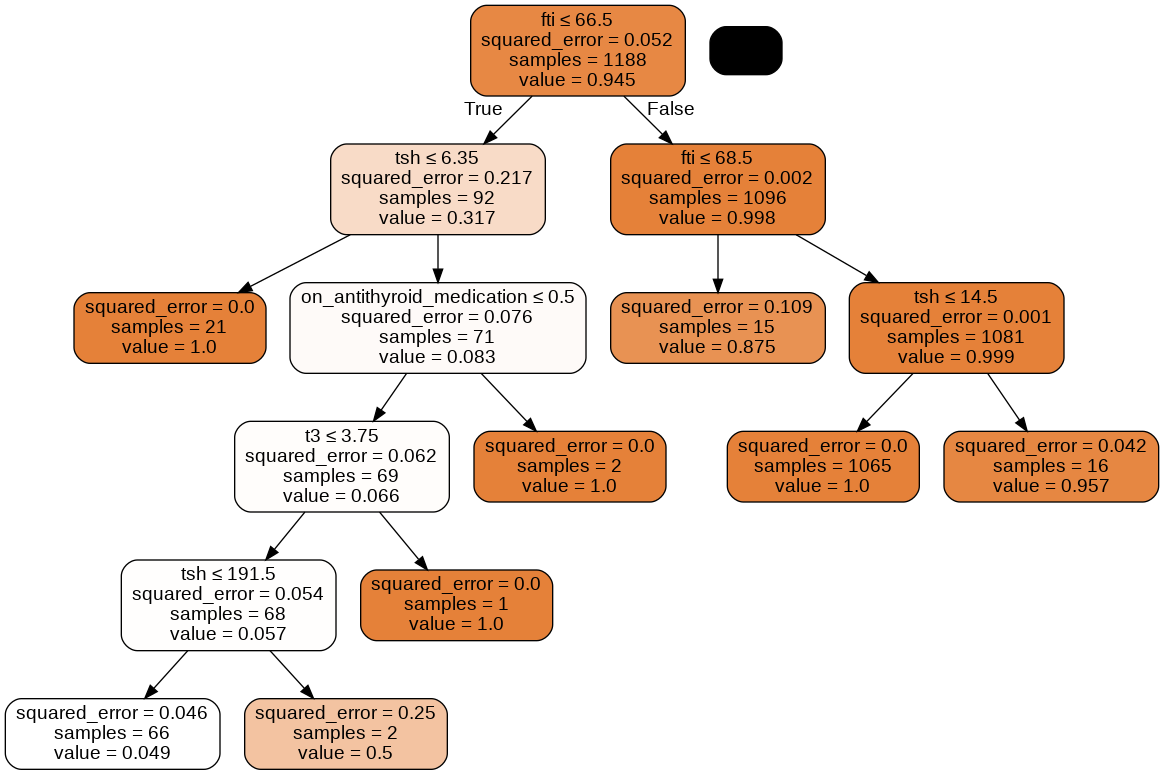

In [43]:
# Visualize the random forest model 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

In [45]:
# get numerical feature importances 
importances = list(forest.estimators_[10].feature_importances_)

# list of tuples with variable and importance

feature_importances = [(feature, round(importance,2)) for feature, importance in zip(X.columns, importances)]

print(feature_importances)
print()

# sort the values in ascending order

feature_importances = sorted(feature_importances, key=(lambda x: x[1]))

[print('variable: {:20}  importance: {}'.format(*pair)) for pair in feature_importances]

[('tsh', 0.19), ('fti', 0.76), ('on_antithyroid_medication', 0.0), ('on_antithyroid_medication', 0.03), ('t3', 0.01), ('age', 0.0)]

variable: on_antithyroid_medication  importance: 0.0
variable: age                   importance: 0.0
variable: t3                    importance: 0.01
variable: on_antithyroid_medication  importance: 0.03
variable: tsh                   importance: 0.19
variable: fti                   importance: 0.76


[None, None, None, None, None, None]

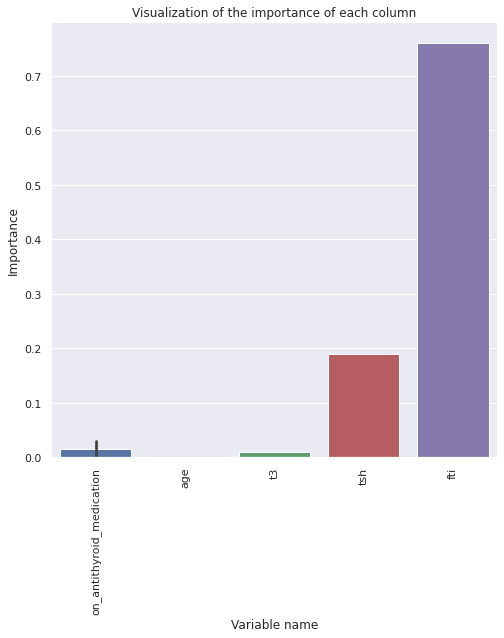

In [46]:
#Visualizing the important features

#Creating the dataframe with the important features
x_val = pd.DataFrame(feature_importances)
x_val
#Plotting the graphs using the seaborn barplot
plt.figure(figsize=(8,8))
sns.barplot(x =0, y = 1, data=x_val)
plt.xlabel('Variable name')
plt.xticks(rotation='vertical')
plt.ylabel('Importance')
plt.title('Visualization of the importance of each column')
plt.show()

## Gradient boosted decision trees

In [48]:
# splitting the data into features and labels 
X = Hyp[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(Hyp['status']=='hypothyroid',0,1)

# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setting the number of trees that we want to predict
target_number_trees = 100

# setting the parameters for the classification boosting and fitting the model
gbc = GradientBoostingClassifier(learning_rate=1, n_estimators = target_number_trees, max_depth=5, min_samples_split=20, random_state=0)

gbc = gbc.fit(X_train, y_train)

# predicting the model
y_pred = gbc.predict(X)

# checking the accuracy of the model
# Evaluating the Algorithm
# ---

from sklearn import metrics

# checking the accuracy of the model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics

print('The mean accuracy score of the model is ', gbc.score(X, y))

The mean accuracy score of the model is  0.9610944848225738


# Support Vector Machine

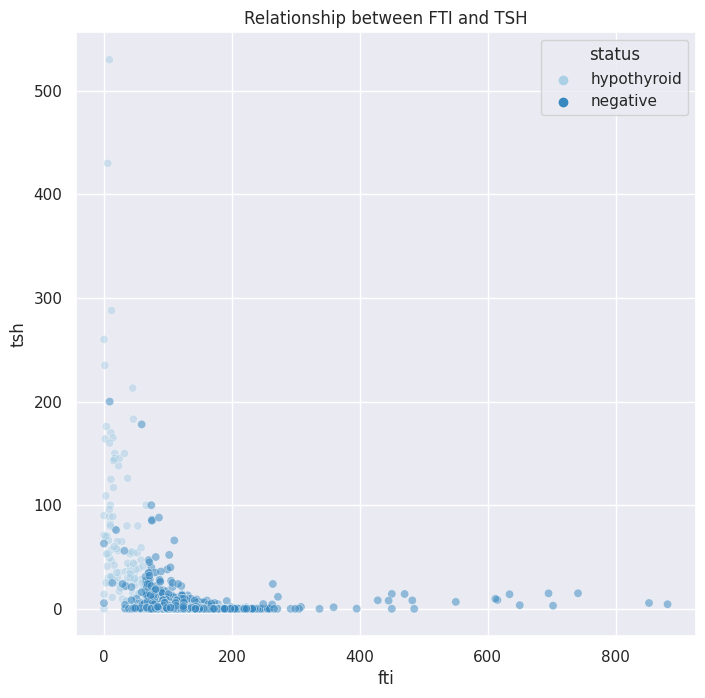

In [50]:
#Visualizing the relation of important features in the data
plt.figure(figsize=(8,8), dpi=100)
sns.scatterplot(x='fti', y='tsh', hue='status', alpha=0.5, data=Hyp, palette='Blues')
plt.title('Relationship between FTI and TSH');

In [51]:
#Fitting the model using a linear function
# split the data into x and y
X = Hyp[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(Hyp['status']=='hypothyroid',0,1)


# standardizing the data
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(X)

# normalizing the data

X = preprocessing.normalize(X)

# splitting the data into training data and testing data. We will train using 80% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# fitting the model into the data

model = SVC(kernel='linear')
  
lin_model = model.fit(X_train,y_train)

# making prediction
y_pred = model.predict(X_test)

# checking the accuracy of the model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the linear model is ', accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.019230769230769232
Mean Squared Error: 0.019230769230769232
Root Mean Squared Error: 0.1386750490563073
The accuracy of the linear model is  0.9807692307692307


# Fitting using the polynomial function.

In [52]:
# fitting the model on to the data
X = Hyp[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(Hyp['status']=='hypothyroid',0,1)

# standardizing the data

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(X)

# normalizing the data

#X_svm = preprocessing.normalize(x)

# splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the model 

poly = SVC(kernel='poly',degree=3, gamma='scale')

# Training the model using the training set

poly.fit(X_train, y_train)
#making prediction
y_pred = poly.predict(X_test)

# checking the accuracy of the model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the linear model is ', accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.019230769230769232
Mean Squared Error: 0.019230769230769232
Root Mean Squared Error: 0.1386750490563073
The accuracy of the linear model is  0.9807692307692307


# Fitting using the RBF function

In [53]:
# splitting the data into x and y values
X = Hyp[['tsh', 'fti', 'on_antithyroid_medication', 'on_antithyroid_medication', 't3', 'age']]
y = np.where(Hyp['status']=='hypothyroid',0,1)


# standardizing the data

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(X)

# normalizing the data

x = preprocessing.normalize(X)

# splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# contructing a model using the RBF function

rbf = SVC(kernel='rbf')

# training the model 

rbf.fit(X, y)

y_pred = rbf.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the linear model is ', accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.014957264957264958
Mean Squared Error: 0.014957264957264958
Root Mean Squared Error: 0.12229989761755714
The accuracy of the linear model is  0.9850427350427351


In [54]:
# Lets compare the performance of our different models

# initialize list of lists
data = [['Baseline Model',  0.019230769230769232, 0.019230769230769232, 0.1386750490563073, '98.1%'], ['Random Forest with grid search', 0.019735460334817087, 0.010839192176258087, 0.10411144114004996, 'Nan'], ['Random Forest', 0.017094017094017096, 0.017094017094017096, 0.1307440900921227, '98.2%'],['Gradient boosted decision tree', 'Nan', 'Nan', 'Nan','94.2%'],['Support Vector Machine Algorithm', 0.019230769230769232, 0.019230769230769232, 0.1386750490563073, '98.1%'],['With Polynomial function', 0.019230769230769232, 0.019230769230769232, 0.1386750490563073, '98.1%'],['With RBF function', 0.014957264957264958, 0.014957264957264958, 0.12229989761755714, '98.5%']]
 
# Create the pandas DataFrame

df = pd.DataFrame(data, columns = ['Model_Name','Mean Absolute Error', 'Mean Squared Error','Root Mean Squared Error','Accuracy'])
 
# print dataframe.
print(df )

                         Model_Name Mean Absolute Error Mean Squared Error  \
0                    Baseline Model            0.019231           0.019231   
1    Random Forest with grid search            0.019735           0.010839   
2                     Random Forest            0.017094           0.017094   
3    Gradient boosted decision tree                 Nan                Nan   
4  Support Vector Machine Algorithm            0.019231           0.019231   
5          With Polynomial function            0.019231           0.019231   
6                 With RBF function            0.014957           0.014957   

  Root Mean Squared Error Accuracy  
0                0.138675    98.1%  
1                0.104111      Nan  
2                0.130744    98.2%  
3                     Nan    94.2%  
4                0.138675    98.1%  
5                0.138675    98.1%  
6                  0.1223    98.5%  


As per the table above, the best performing model was the RBF model, scoring an accuracy of 98.5%. Hence passing the metric of success.

The least performing model was the Gradient boosted decision tree with an accuracy score of 94.2%

